# Carregamento do Dataset
Estes dados forma retirados do Kaggle, disponível em: 
https://www.kaggle.com/harshilpatel355/autoirrigationdata?select=demo1.csv

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

In [2]:
#lendos os dados
dados = pd.read_csv('data.csv')
dados.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [3]:
#crop nao sera ultil na classificacao, portantanto decidi retirar a coluna do dataset
dados = dados.loc[:, dados.columns != 'crop']
dados.head()

,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1


# Normalização
Aqui iremos normalizar o dado para trabalharmos em uma mesma escala e para termos um número definido de bits que trataremos em nossa FSM. Como temos um Para realizar a redução de dimensionalidade utilizaremos o redutor de dimensionalidade PAC.

In [4]:
X = np.array(dados.drop(['pump'], axis = 1))
y = np.array(dados['pump'])

In [5]:
#nao eh nescessario fazer a normalizacao de 'pump' por isso vamos tira-lo do meio das colunas
#que queremos normalizar
coluna_para_nao_normalizar = ['pump']
colunas_para_normalizar = [x for x in list(dados) if x not in coluna_para_nao_normalizar ]

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

x = dados[colunas_para_normalizar].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dados_temporarios = pd.DataFrame(x_scaled, columns=colunas_para_normalizar, index = dados.index)
dados[colunas_para_normalizar] = dados_temporarios
dados.head()

,moisture,temp,pump
0,0.622790,0.171429,1
1,0.508841,0.228571,1
2,0.723969,0.342857,1
3,0.779961,0.628571,1
4,0.673870,0.514286,1


In [10]:
X = np.array(dados.drop(['pump'], axis = 1))
y = np.array(dados['pump'])

In [12]:
#Utilizaremos o PCA para reducao de dimensionalidadde
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
X_reduced = pca.fit(X).transform(X)
X_reduced = pd.DataFrame(data = X_reduced, columns=['x', 'y'])

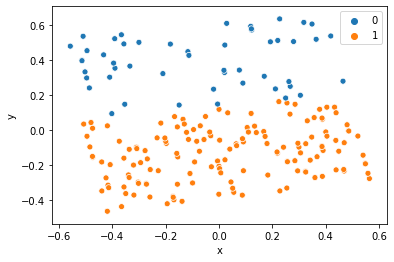

In [27]:
import seaborn as sns
sns.scatterplot(x='x', y='y', hue=y ,data=X_reduced)

In [29]:
#Baixando os dados
dados.to_csv("dado_irrigação_norm.csv", index=False)

# Cross Validation

Algo muito importante na área do machine Learning é a validação do nosso modelo, desta forma utilizaremos a validação cruzada (Cross Validation) k-fold com k igual a 5. No final, faremos uma média das acurácias, obtendo assim uma acurácia aproximada de nossa rede neural.

In [18]:
#Configuração Cross Validation
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle = True)
features = dados.columns != 'pump'

In [26]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(solver='sgd', random_state=1, max_iter=10000,
         hidden_layer_sizes=[2, 1],
    )

acuracias = []
i = 1
for train_index, test_index in kf5.split(dados):
    X_train = dados.iloc[train_index].loc[:,features]
    X_test = dados.iloc[test_index].loc[:,features]
    y_train = dados.iloc[train_index].loc[:,'pump']
    y_test = dados.loc[test_index].loc[:,'pump']
        
    #Treinamento
    mlpclf.fit(X_train, y_train) #Treinamento do modelo 
    score = mlpclf.score(X_test,y_test) #Acuracia
    acuracias.append(score)
    print(f"Accuracy for the fold no. {i} on the test set: {score*100}%")
    i += 1

tot_acuracias = 0
for acuracia in acuracias:
    tot_acuracias += acuracia
media_acuracias = tot_acuracias/5
print(f"Acuracia do modelo: {media_acuracias*100}%")

Accuracy for the fold no. 1 on the test set: 72.5%
Accuracy for the fold no. 2 on the test set: 77.5%
Accuracy for the fold no. 3 on the test set: 82.5%
Accuracy for the fold no. 4 on the test set: 75.0%
Accuracy for the fold no. 5 on the test set: 67.5%
Acuracia do modelo: 75.0%
